In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('pizza_v1.csv')
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,A,"Rp248,000",18.0,mozzarella,double_signature,jumbo,yes,no


In [3]:
df.tail()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
124,E,"Rp39,000",8.5,tuna,spicy tuna,small,yes,yes
125,E,"Rp72,000",12.0,tuna,spicy tuna,medium,yes,yes
126,E,"Rp99,000",14.0,tuna,spicy tuna,large,yes,yes
127,E,"Rp44,000",8.5,meat,BBQ_meat_fiesta,small,yes,no
128,E,"Rp78,000",12.0,meat,BBQ_meat_fiesta,medium,no,no


In [4]:
df.shape


(129, 8)

In [5]:
print('The number of rows is',df.shape[0])
print('The number of columns  is',df.shape[1])

The number of rows is 129
The number of columns  is 8


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       129 non-null    object 
 1   price_rupiah  129 non-null    object 
 2   diameter      129 non-null    float64
 3   topping       129 non-null    object 
 4   variant       129 non-null    object 
 5   size          129 non-null    object 
 6   extra_sauce   129 non-null    object 
 7   extra_cheese  129 non-null    object 
dtypes: float64(1), object(7)
memory usage: 8.2+ KB


In [7]:
df.describe()

,diameter
count,129.000000
mean,12.976744
std,3.272674
min,8.000000
25%,12.000000
50%,12.000000
75%,14.000000
max,22.000000


In [8]:
df.isnull().sum()

company         0
price_rupiah    0
diameter        0
topping         0
variant         0
size            0
extra_sauce     0
extra_cheese    0
dtype: int64

In [9]:
df.columns

Index(['company', 'price_rupiah', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese'],
      dtype='object')

#### Looking at our target variable(Price_rupiah),we will need to drop the currency symbols and the commas...but we will need to first rename price_rupiah as just Price

In [10]:
df.rename({'price_rupiah':'price'},axis=1,inplace=True)

In [11]:
df.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,A,"Rp248,000",18.0,mozzarella,double_signature,jumbo,yes,no


Now let's remove 'Rp' and Commas:

In [12]:
df["price"] = (df["price"] .str.replace("Rp", "") .str.replace(",", "") .astype('int32'))

In [13]:
df.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,235000,22.0,chicken,double_signature,jumbo,yes,yes
1,A,198000,20.0,papperoni,double_signature,jumbo,yes,yes
2,A,120000,16.0,mushrooms,double_signature,reguler,yes,yes
3,A,155000,14.0,smoked beef,double_signature,reguler,yes,no
4,A,248000,18.0,mozzarella,double_signature,jumbo,yes,no


#### Now,let's try to convert this indonesian currency into Nigerian currency using google to check the values...According to google,1 rupiah = 0.028 Nigerian naira

In [14]:
def convert (value):
    return value*0.028

In [15]:
df['price']=df['price'].apply(convert)

In [16]:
df.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,6580.0,22.0,chicken,double_signature,jumbo,yes,yes
1,A,5544.0,20.0,papperoni,double_signature,jumbo,yes,yes
2,A,3360.0,16.0,mushrooms,double_signature,reguler,yes,yes
3,A,4340.0,14.0,smoked beef,double_signature,reguler,yes,no
4,A,6944.0,18.0,mozzarella,double_signature,jumbo,yes,no


#### Now,it has been converted to Naira. 


#### Let's look at the diameter column,we don't need to adjust anything there.So we are good to go

## DATA ANALYSIS PROPER:

#### First of all,we are going to perform univariate and bivariate analysis

### What is Univariate Analysis?

#### Here,we take one variable at a time and analyze.It doesn't deal with any relationships

In [17]:
df.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese'],
      dtype='object')

#### Company

In [18]:
df['company'].value_counts()

E    30
C    30
A    25
B    24
D    20
Name: company, dtype: int64

#### Price

##### We cannot use valuecounts for price because there are a lot of varieties in it.So ,just plot histogram

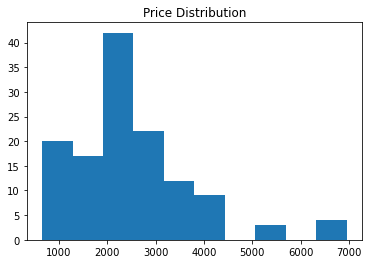

In [19]:
plt.hist(x='price',data=df)
plt.title('Price Distribution')
plt.show()

#### Diameter

In [20]:
df['diameter'].value_counts()

12.0    49
14.0    24
8.5     22
17.0    10
18.5     6
16.0     5
8.0      4
16.5     4
22.0     3
20.0     1
18.0     1
Name: diameter, dtype: int64

##### We will have to visualize this column 

C:\Users\DAMMY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diameter', ylabel='count'>

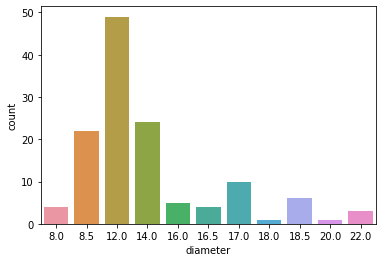

In [21]:
sns.countplot(df['diameter'])

#### Topping

In [22]:
df['topping'].value_counts()

chicken         29
mushrooms       22
mozzarella      21
smoked beef     19
vegetables       9
tuna             9
meat             8
beef             3
black papper     3
sausage          3
papperoni        2
onion            1
Name: topping, dtype: int64

<AxesSubplot:xlabel='count', ylabel='topping'>

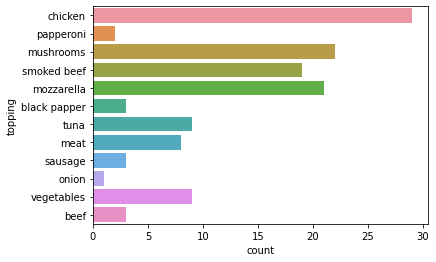

In [23]:
sns.countplot(y= df['topping'])

#### Variant

In [24]:
df['variant'].value_counts()

classic              30
new_york             10
crunchy              10
meat_lovers          10
double_mix           10
double_decker         9
super_supreme         5
BBQ_meat_fiesta       5
double_signature      5
american_favorite     5
extravaganza          3
spicy tuna            3
italian_veggie        3
gournet_greek         3
spicy_tuna            3
BBQ_sausage           3
thai_veggie           3
american_classic      3
neptune_tuna          3
meat_eater            3
Name: variant, dtype: int64

<AxesSubplot:xlabel='count', ylabel='variant'>

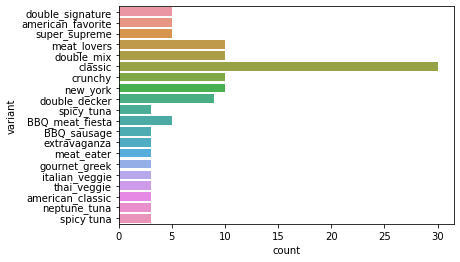

In [25]:
sns.countplot(y= df['variant'])

#### Size

In [26]:
df['size'].value_counts()

medium     41
small      22
large      21
reguler    20
jumbo      15
XL         10
Name: size, dtype: int64

C:\Users\DAMMY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='size', ylabel='count'>

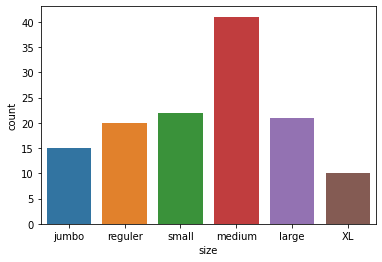

In [27]:
sns.countplot(df['size'])

#### Extra Sauce

In [28]:
df.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese'],
      dtype='object')

C:\Users\DAMMY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='extra_sauce', ylabel='count'>

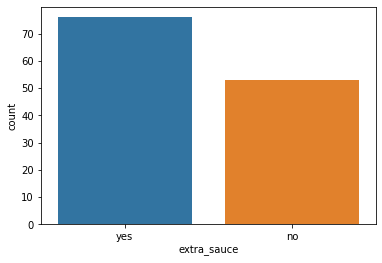

In [29]:
sns.countplot(df['extra_sauce'])

#### Extra Cheese

C:\Users\DAMMY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='extra_cheese', ylabel='count'>

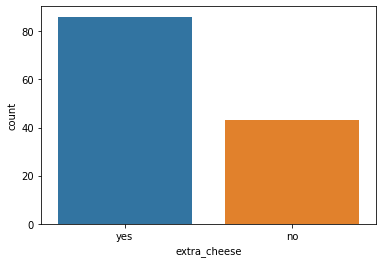

In [30]:
sns.countplot(df['extra_cheese'])

### Bivarate Analysis

#### Price by Company

In [31]:
df.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese'],
      dtype='object')

C:\Users\DAMMY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='company', ylabel='price'>

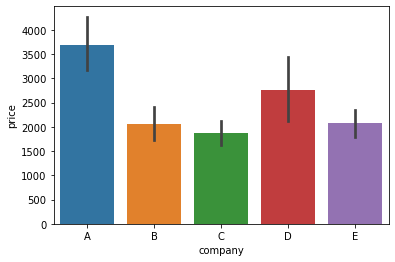

In [32]:
sns.barplot(df['company'],df['price'])

#### Price by topping

<AxesSubplot:xlabel='price', ylabel='topping'>

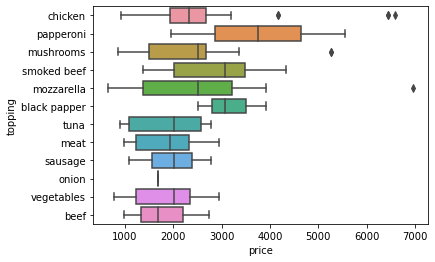

In [33]:
sns.boxplot(y = 'topping',x='price',data=df)

#### Price by Size

<AxesSubplot:xlabel='size', ylabel='price'>

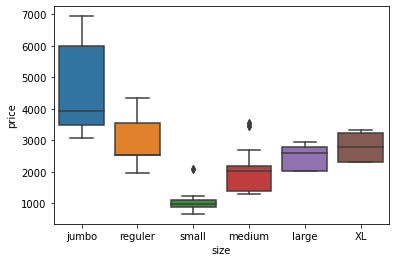

In [34]:
sns.boxplot( x ='size',y='price',data=df)

#### Find The Most Expensive Pizza

In [35]:
df.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese'],
      dtype='object')

In [36]:
df[df['price'].max()==df['price']]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese
4,A,6944.0,18.0,mozzarella,double_signature,jumbo,yes,no


#### Find Diameter Of Jumbo Size Pizza

In [37]:
df[df['size']=='jumbo']['diameter'].head()

0    22.0
1    20.0
4    18.0
5    18.5
6    16.0
Name: diameter, dtype: float64

#### Find Diameter Of Jumbo XL size Pizza

In [38]:
df[df['size']=='XL']['diameter'].head()

29    17.0
35    17.0
41    17.0
47    17.0
93    17.0
Name: diameter, dtype: float64

#### From our observation,diameter 16.0 isnt proper for a jumbo size pizza,it's even smaller than an XL pizza.It should be larger,So it is an outlier

##### Now,Let's remove outliers

In [39]:
df[(df['size']=='jumbo') & (df['diameter']<=16)]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese
6,A,3080.0,16.0,smoked beef,american_favorite,jumbo,no,yes
11,A,3080.0,16.0,black papper,super_supreme,jumbo,yes,yes
16,A,3080.0,16.0,smoked beef,meat_lovers,jumbo,no,yes
80,D,3080.0,16.0,smoked beef,meat_lovers,jumbo,no,yes


In [40]:
df = df.drop(df.index[[6,11,16,80]])

In [41]:
df[(df['size']=='jumbo') & (df['diameter']<=16)]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese


#### Label Encoding

##### To perform Label encoding,we will need to first of all know the columns with categorical data..(Object Datasets).We will import Label Encoder.Lets us store df.select_dtypes(include = ['object']).columns in a variable 'cat_col'

In [42]:
cat_cols=df.select_dtypes(include = ['object']).columns

In [43]:
cat_cols

Index(['company', 'topping', 'variant', 'size', 'extra_sauce', 'extra_cheese'], dtype='object')

In [44]:
df.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,6580.0,22.0,chicken,double_signature,jumbo,yes,yes
1,A,5544.0,20.0,papperoni,double_signature,jumbo,yes,yes
2,A,3360.0,16.0,mushrooms,double_signature,reguler,yes,yes
3,A,4340.0,14.0,smoked beef,double_signature,reguler,yes,no
4,A,6944.0,18.0,mozzarella,double_signature,jumbo,yes,no


In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
en=LabelEncoder()
for i in cat_cols:
    df[i]=en.fit_transform(df[i])

In [47]:
df.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese
0,0,6580.0,22.0,2,8,1,1,1
1,0,5544.0,20.0,7,8,1,1,1
2,0,3360.0,16.0,5,8,4,1,1
3,0,4340.0,14.0,9,8,4,1,0
4,0,6944.0,18.0,4,8,1,1,0


#### Store Feature Matrix in X and Response(Target) in Vector y

In [48]:
X = df.drop('price',axis=1)
y=df['price']

#### Split into Train Test Split

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#### Now Let's Import our Models
#### From our target(price) observations,we have continuous values,so this is a regression problem

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [52]:
lr = LinearRegression()
lr.fit(X_train,y_train)

svm = SVR()
svm.fit(X_train,y_train)


rf = RandomForestRegressor()
rf.fit(X_train,y_train)

gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

xg = XGBRegressor()
xg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [53]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gbr.predict(X_test)
y_pred5 = xg.predict(X_test)

#### Evaluating The Algorithm

In [54]:
from sklearn import metrics

In [55]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)
score5 = metrics.r2_score(y_test,y_pred5)

In [56]:
print(score1,score2,score3,score4,score5)

0.6757989518078646 -0.08782600509913752 0.8223059669401455 0.883729879794203 0.9039162629392916


##### Now let's Visualize this Result

In [57]:
final_data = pd.DataFrame({'Models':['LR','SVR','RF','GB','XGR'],
                           'R2_SCORE':[score1,score2,score3,score4,score5]})

In [58]:
final_data

,Models,R2_SCORE
0,LR,0.675799
1,SVR,-0.087826
2,RF,0.822306
3,GB,0.883730
4,XGR,0.903916


C:\Users\DAMMY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='R2_SCORE'>

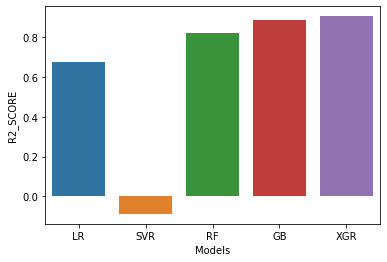

In [59]:
sns.barplot(final_data['Models'],final_data['R2_SCORE'])

#### FEATURE IMPORTANCE
##### Feature importance refers to techniques that calculate a score for all input features for a given model - the scores simply represent the "importance" of each feature.A higher score means that the specific feature will have a larger effect on the model that's being used to predict a certain variable.
##### So we will perform feature importance on the three highest algorithms on the graph (RF,GB,XGR)

##### Random Forest

In [60]:
rf.feature_importances_

array([0.03044763, 0.58553589, 0.03992974, 0.12110921, 0.1854139 ,
       0.02223196, 0.01533168])

In [61]:
fea = pd.Series(rf.feature_importances_,index = X_train.columns)

In [62]:
fea

company         0.030448
diameter        0.585536
topping         0.039930
variant         0.121109
size            0.185414
extra_sauce     0.022232
extra_cheese    0.015332
dtype: float64

<AxesSubplot:>

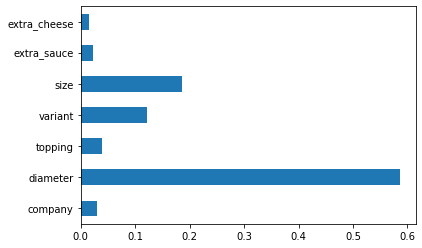

In [63]:
fea.plot(kind ='barh')

##### Gradient Boosting

In [64]:
gbr.feature_importances_

array([0.00604876, 0.63753884, 0.05339196, 0.10318306, 0.1627675 ,
       0.0334586 , 0.00361128])

In [65]:
fea = pd.Series(gbr.feature_importances_,index = X_train.columns)

In [66]:
fea

company         0.006049
diameter        0.637539
topping         0.053392
variant         0.103183
size            0.162767
extra_sauce     0.033459
extra_cheese    0.003611
dtype: float64

<AxesSubplot:>

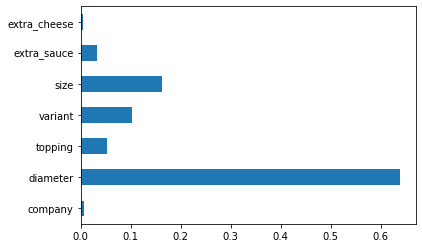

In [67]:
fea.plot(kind ='barh')

##### XGBRegressor

In [68]:
xg.feature_importances_

array([0.00433934, 0.38954747, 0.01756057, 0.03700026, 0.4620144 ,
       0.0752281 , 0.0143099 ], dtype=float32)

In [69]:
fea = pd.Series(xg.feature_importances_,index = X_train.columns)

In [70]:
fea

company         0.004339
diameter        0.389547
topping         0.017561
variant         0.037000
size            0.462014
extra_sauce     0.075228
extra_cheese    0.014310
dtype: float32

<AxesSubplot:>

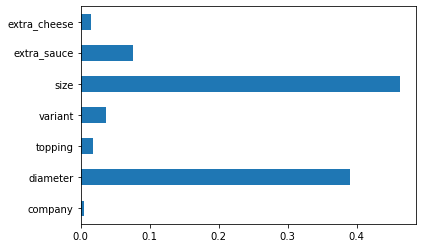

In [71]:
fea.plot(kind ='barh')

#### LET'S SAVE THE MODEL
##### From our observations,we can see that XGB is the best and most accurate model of the lots.So we will train our entire datasets on XGBoost for future predictions.

In [72]:
X = df.drop('price',axis=1)
y=df['price']

In [73]:
xg = XGBRegressor()
xg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

Now let us save this Model

In [74]:
import joblib

In [75]:
joblib.dump(xg,'pizza_price_prediction')

['pizza_price_prediction']

In [76]:
Our_model=joblib.load('pizza_price_prediction')

##### Let's try to predict the outcome of an imaginary row with dependent and independent variables.

In [77]:
df = pd.DataFrame({
    'Company':1,
    'diameter':22.0,
    'topping':2,
    'variant':8,
    'size':1,
    'extra_sauce':1,
    'extra_cheese':1},index = [0])

In [78]:
df

,Company,diameter,topping,variant,size,extra_sauce,extra_cheese
0,1,22.0,2,8,1,1,1


In [79]:
Our_model.predict(df)

array([6441.553], dtype=float32)

#### GUI

In [80]:
from tkinter import*
import joblib

def show_entry():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    p7=float(e7.get())
    p8=float(e8.get())
    
    model = joblib.load('pizza_price_prediction')
    df = pd.DataFrame({
    'Company':p1,
    'diameter':p2,
    'topping':p3,
    'variant':p4,
    'size':p5,
    'extra_sauce':p6,
    'extra_cheese':1},index = [0])
    
    Label(master,text='Pizza Cost is:').grid(row=8)
    Label(master,text=result).grid(row=9)
master =Tk()
master.title("Pizza Price Prediction")
label=Label(master,text="Pizza Price Prediction",bg='black',
               fg='white').grid(row=0,columnspan=2)

Label(master,text="Enter Company Name").grid(row=1)
Label(master,text="Enter Pizza Diameter").grid(row=2)
Label(master,text="Enter topping").grid(row=3)
Label(master,text="Enter Variant").grid(row=4)
Label(master,text="Enter size").grid(row=5)
Label(master,text="Enter Extra_Sauce").grid(row=6)
Label(master,text="Enter Extra_Cheese").grid(row=7)

e1=Entry(master)
e2=Entry(master)
e3=Entry(master)
e4=Entry(master)
e5=Entry(master)
e6=Entry(master)
e7=Entry(master)



e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)

Button(master,text='Predict',command=show_entry).grid()

mainloop()

